<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (768, 9)
Dataset head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


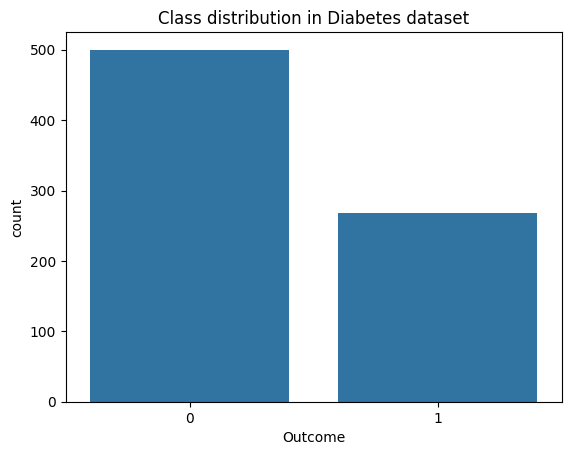

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5575 - loss: 0.6845 - val_accuracy: 0.7143 - val_loss: 0.6407
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7352 - loss: 0.6192 - val_accuracy: 0.7338 - val_loss: 0.5673
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7423 - loss: 0.5537 - val_accuracy: 0.7857 - val_loss: 0.5080
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7451 - loss: 0.5254 - val_accuracy: 0.8052 - val_loss: 0.4771
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7553 - loss: 0.5038 - val_accuracy: 0.7922 - val_loss: 0.4725
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7762 - loss: 0.4655 - val_accuracy: 0.7922 - val_loss: 0.4762
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7851 - loss: 0.4598 - val_accuracy: 0.7987 - val_loss: 0.4741
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7811 - loss: 0.4615 - val_accuracy: 0.7857 - val_loss: 0.4789
E

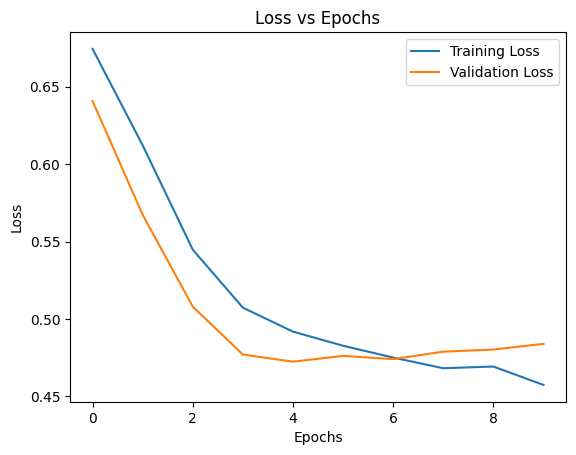

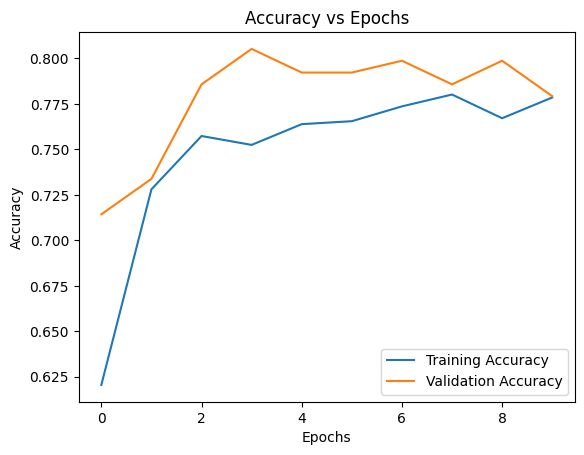

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7563 - loss: 0.4960 
Test Accuracy: 77.92%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class for the first test instance: 0


In [14]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the Pima Indian Diabetes Dataset
dataset = pd.read_csv("diabetes.csv")
X = dataset.iloc[:, :-1].values  # All features except the last column (Outcome)
y = dataset.iloc[:, -1].values   # The target column (Outcome)


# Step 3: Explore the dataset
print("Dataset shape:", dataset.shape)
print("Dataset head:\n", dataset.head())

# Step 4: Data visualization
# Visualizing the distribution of the target class
sns.countplot(x="Outcome", data=dataset)
plt.title("Class distribution in Diabetes dataset")
plt.show()

# Step 5: Pre-process the data
# Split dataset into features (X) and target (y)
X = dataset.drop("Outcome", axis=1).values  # Features
y = dataset["Outcome"].values  # Target variable (Diabetes outcome)

# Normalize features using StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Step 6: Reshape data to fit CNN input requirements (converting 1D to 2D)
# Reshape data to have shape (samples, features, 1) for Conv1D
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Shape should be (samples, features, 1)

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

def create_cnn_model():
    model = models.Sequential([
        # Conv1D layer with 32 filters, kernel size 3, and ReLU activation function
        layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Shape should be (features, 1)
        layers.MaxPooling1D(2),

        # Second Conv1D layer with 64 filters
        layers.Conv1D(64, 3, activation='relu'),
        # Reduced the MaxPooling1D here or remove completely
        layers.MaxPooling1D(2,padding='same'),
        # Third Conv1D layer with 64 filters
        layers.Conv1D(64, 3, activation='relu',padding='same'), # Added padding here to ensure the spatial dimensions are maintained

        # Flatten the output to connect to Dense layers
        layers.Flatten(),

        # Fully connected Dense layer with 64 units
        layers.Dense(64, activation='relu'),

        # Output layer for binary classification (2 classes)
        layers.Dense(2, activation='softmax')
    ])
    return model

# Step 10: Compile the model
model = create_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 11: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Step 12: Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

# Step 13: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

# Step 14: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 15: Predict on the first test instance
y_pred = model.predict(X_test)
print(f"Predicted Class for the first test instance: {np.argmax(y_pred[0])}")
